In [2]:
from typing import Optional, Any, Literal
import pandas as pd
import seaborn as sb
import numpy as np

#Problema

**Un sensor de temperatura ubicado en una caldera indutrial registró las siguientes temperaturas en diferentes momentos del proceso**

In [3]:
f_t:list = [25,30,40,60]
t:list = [0,5,10,20]

In [4]:
pd.DataFrame({"Minutos (t)":t,"Grados C f(t)":f_t})

,Minutos (t),Grados C f(t)
0,0,25
1,5,30
2,10,40
3,20,60


# Obtener

- **La temperatura aproximada en:**

$t$ $=$ $15$ $minutos$

- Calcular interpolación de Lagrange para evaluar en cualquier punto

- Definir la función para poder evaluar en cualquier punto

- La formula es la siguiente

# **$$L_{n,k}(x) = \prod_{\substack{i=0\\ i \neq k}}^n \frac{x - x_i}{x_k - x_i}$$**

- Por lo tanto resulta de la siguiente manera

# **$$ P_3(x) = y_0L_{3,0} + y_1L_{3,1} + y_2L_{3,2} + y_3L_{3,3}$$**

- Y los valores de L son los siguientes respecto a L(x)


# $L_{3,0}(x) = \frac{(x - x_1)(x - x_2)(x - x_3)}{(x_0 - x_1)(x_0 - x_3)(x_0 - x_3)}$

# $L_{3,1}(x) = \frac{(x - x_0)(x - x_2)(x - x_3)}{(x_1 - x_0)(x_1 - x_2)(x_1 - x_3)}$

# $L_{3,2}(x) = \frac{(x - x_0)(x - x_1)(x - x_3)}{(x_2 - x_0)(x_2 - x_1)(x_0 - x_3)}$

# $L_{3,3}(x) = \frac{(x - x_0)(x - x_1)(x - x_2)}{(x_2 - x_0)(x_2 - x_1)(x_0 - x_2)}$



- Definimos un arreglo como salida de la función para poder graficar la función de los resultados obtenidos por $L(x)$, posteriormente sus productos con $y$

In [5]:
def interpolación(valor_interpolar:float|int, *arrays) -> Optional[list[list[int|float],list[int|float],list[int|float]]]:
    
    #Definimos la cantidad de columnas que tiene f(t) y t en la grafica para saber su longitud#
    rows_funcion:int = len(arrays[0])
    rows_tvalues:int = len(arrays[1]) 

    #Se obtienen los valores de x para utilizarlos para calcular L(x)
    valores_x:list[str|float] = arrays[1]

    #Se realiza una lista para almacenar los valores de L(x)#
    L_values:list[float|str] = []
    valores_ft:list[float|int] = []
    multiplicaciones_lval:list = [] 

    
            
        #Utilizamos realizar el productorio para obtener el valor de las L(x)#    
    for k in range(rows_tvalues):
        parte_superior = 1
        parte_inferior = 1
        for n in range(rows_funcion):
            if n != k:
                #print(n,k)
                parte_superior *= (valor_interpolar - valores_x[n])
                parte_inferior *= (valores_x[k] - valores_x[n])
                #print(parte_superior, "\n", parte_inferior)

        #Se realiza la division del productorio y se añade a la lista
        l:float|int  = parte_superior/parte_inferior 
        L_values.append(l); valores_ft.append(arrays[0][k])
    
    multiplicaciones_lval = (np.array(L_values) * np.array(valores_ft)).tolist()


    #Se devuelve el Arreglo#
    return L_values,valores_ft,multiplicaciones_lval


In [6]:
numero:str = input()
try: numero_evaluar:int|float = int(numero); 
except ValueError: numero_evaluar:int|float = float(numero)

In [7]:
interpol, f_x, multiplication = interpolación(numero_evaluar, f_t, t)

In [8]:
multiplication
sum(multiplication)

51.25

In [9]:
numero2:str = input()
try: numero_evaluar2:int|float = int(numero2); 
except ValueError: numero_evaluar2:int|float = float(numero2)

In [10]:
interpol2, f_x2, multiplication2 = interpolación(numero_evaluar2, f_t, t)

In [11]:
sum(multiplication2)

30.0

In [12]:
ft_values = f_t; ft_values.append(sum(multiplication))
t_values = t; t_values.append(numero_evaluar)

In [13]:
ft_values.sort(); t_values.sort()


In [15]:
gf = pd.DataFrame({"valores_t":t_values,"Valores_evaluados":ft_values})
gf["valores_t"] = gf["valores_t"].astype(float)
gf["Valores_evaluados"] = gf["Valores_evaluados"].astype(float)

In [17]:
import matplotlib.pyplot as plt

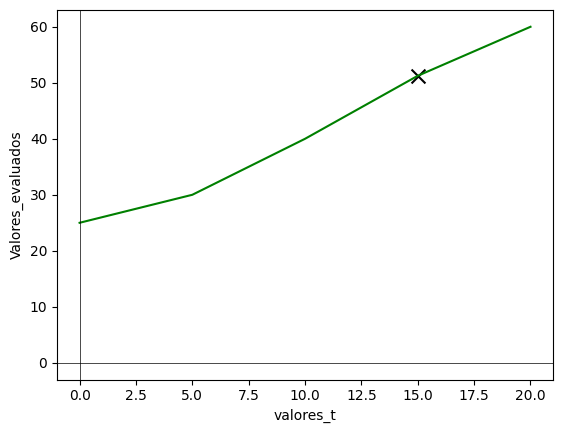

In [37]:
sb.lineplot(x = 'valores_t',y ='Valores_evaluados',data=gf, color = "g")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
 

valorf_1t = sum(multiplication)
plt.scatter(numero_evaluar,valorf_1t, color = 'k', marker= 'x', s = 100, label= "valor predecido")
plt.show()